In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('dataset_tortuga.csv')  # Replace with your actual dataset filename

In [4]:

# Assuming the target variable is 'PROFILE'
X = data.drop(['PROFILE', 'id_2', 'NAME', 'USER_ID'], axis=1)
y = data['PROFILE']

In [5]:
print(data['PROFILE'].nunique())

6


In [6]:

# Encode the target variable
profile_mapping = {profile: idx for idx, profile in enumerate(y.unique())}
y = y.map(profile_mapping)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Label encode the PROFILE column
data['PROFILE'] = LabelEncoder().fit_transform(data['PROFILE'])


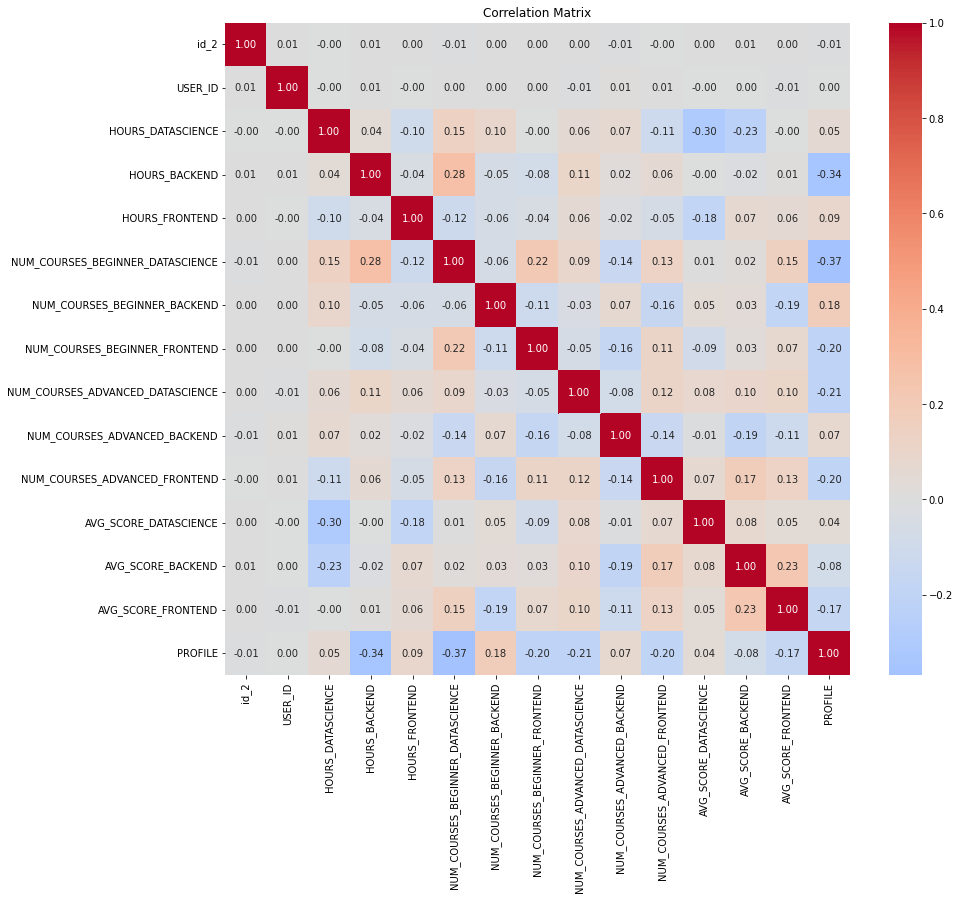

In [20]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [26]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42)
}

In [28]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [29]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [30]:
# Create pipeline for each model
def create_pipeline(classifier):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

In [31]:
# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

Random Forest Accuracy: 0.9095
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       654
           1       0.93      0.91      0.92       681
           2       0.90      0.94      0.92       651
           3       0.89      0.89      0.89       655
           4       0.90      0.88      0.89       710
           5       0.92      0.90      0.91       649

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000

SVM Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       654
           1       0.96      0.94      0.95       681
           2       0.95      0.96      0.95       651
           3       0.94      0.95      0.95       655
           4       0.94      0.94      0.94       710
           5       0.96      0.94      0.95       649

    accuracy             

C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


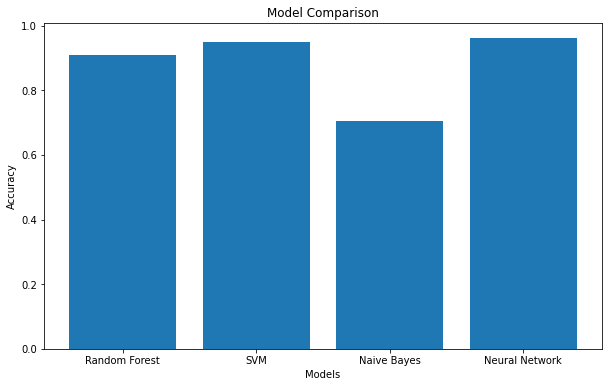

In [32]:

# Plot model comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

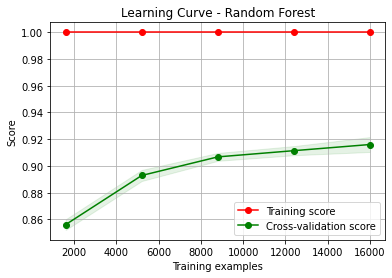

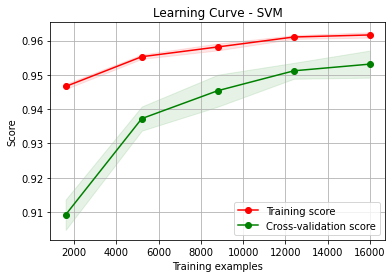

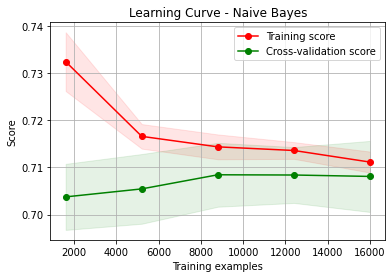

C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

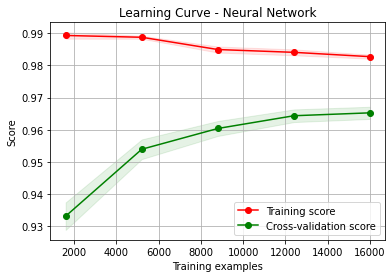

In [33]:

# Plot learning curves for each model
for name, model in models.items():
    pipeline = create_pipeline(model)
    plt = plot_learning_curve(pipeline, f'Learning Curve - {name}', X, y, cv=5)
    plt.show()


In [34]:
# Define parameter grids for GridSearchCV
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__max_features': ['sqrt'],
        'classifier__class_weight': ['balanced', None]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__gamma': ['scale'],
        'classifier__class_weight': ['balanced', None]
    },
    'Neural Network': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__alpha': [0.0001, 0.001, 0.01],
        'classifier__learning_rate': ['constant', 'adaptive'],
        'classifier__batch_size': [32, 64, 128],
        'classifier__max_iter': [1000]
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}



Training Random Forest...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'classifier__class_weight': None, 'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy: 0.9103
Precision: 0.9104
Recall: 0.9103
F1-score: 0.9102
ROC AUC Score: 0.9885


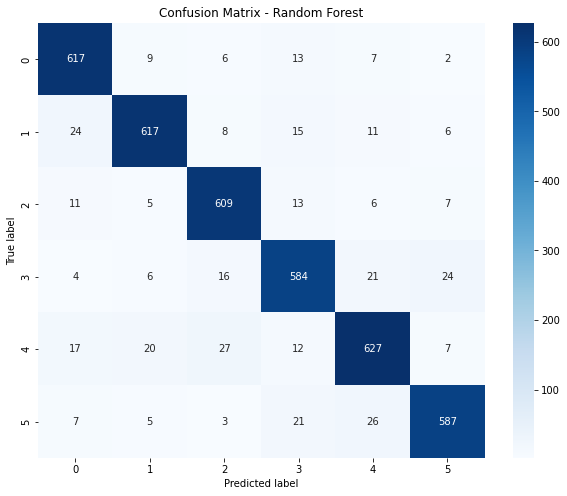

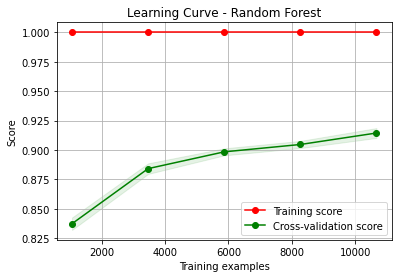

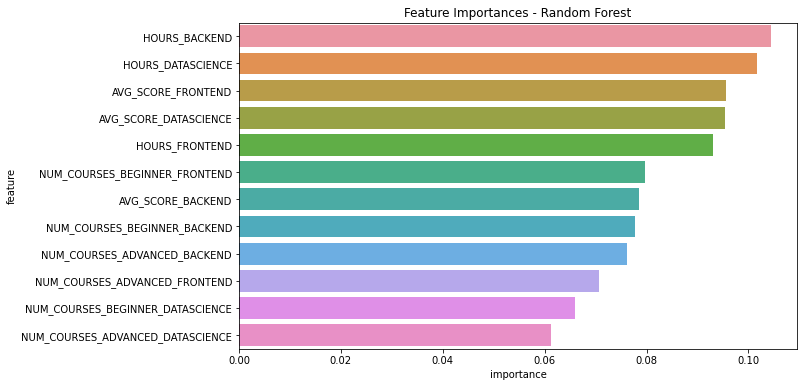


Training SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Accuracy: 0.9565
Precision: 0.9566
Recall: 0.9565
F1-score: 0.9565
ROC AUC Score: 0.9931


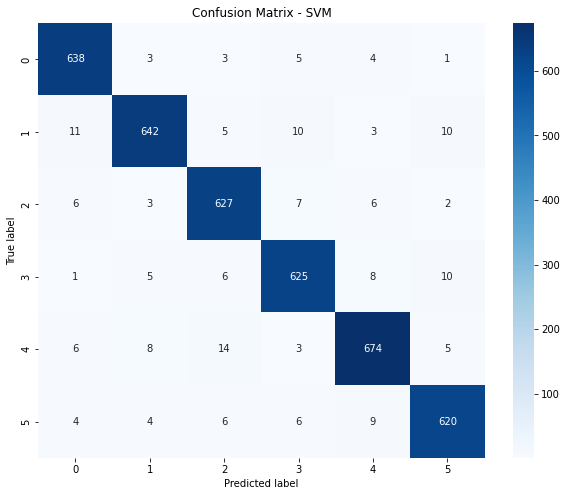

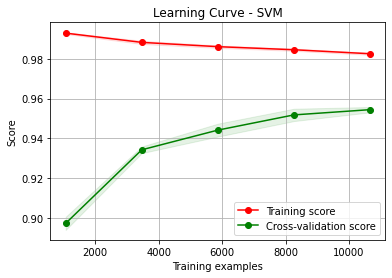


Training Naive Bayes...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters: {'classifier__var_smoothing': 1e-09}
Accuracy: 0.7037
Precision: 0.7043
Recall: 0.7037
F1-score: 0.7037
ROC AUC Score: 0.9300


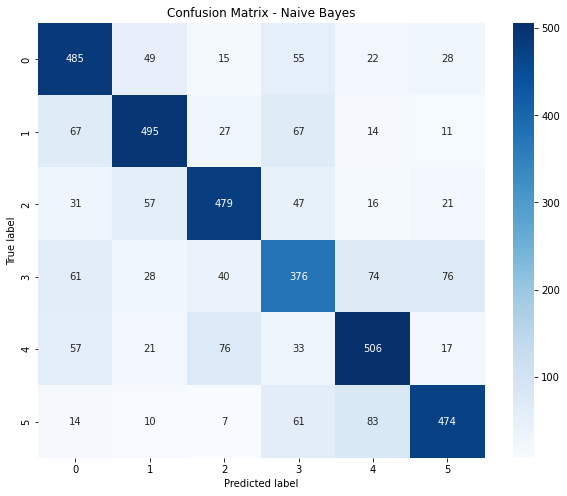

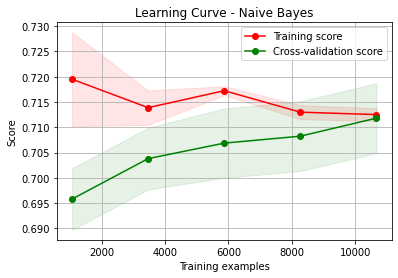


Training Neural Network...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__batch_size': 32, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 1000}
Accuracy: 0.9685
Precision: 0.9686
Recall: 0.9685
F1-score: 0.9685
ROC AUC Score: 0.9939


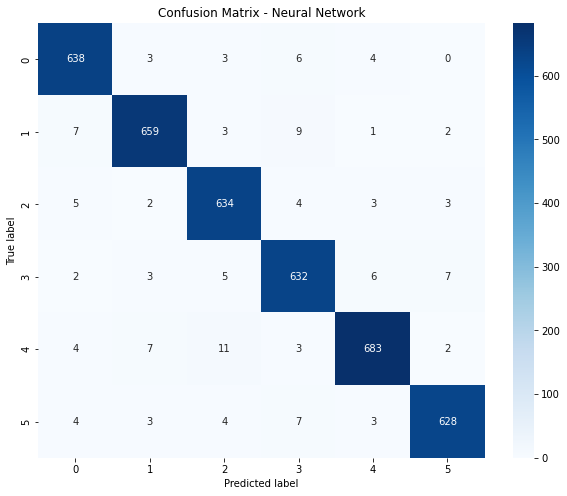

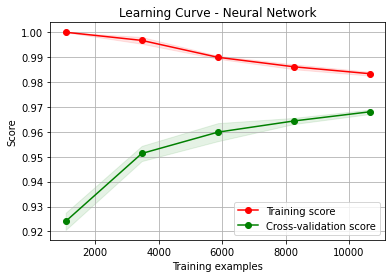

In [35]:
grid_searches = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline = create_pipeline(model)
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    grid_searches.append(grid_search)
    
    # Best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
    y_pred_proba = best_model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    
    # Print results and plot confusion matrix
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    plot_confusion_matrix(cm, f'Confusion Matrix - {name}')
    plot_learning_curve(best_model, f"Learning Curve - {name}", X_train, y_train, cv=3)
    plt.show()
    
    # Feature importances for Random Forest
    if name == 'Random Forest':
        feature_importance = best_model.named_steps['classifier'].feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
        importance_df = importance_df.sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=importance_df)
        plt.title(f'Feature Importances - {name}')
        plt.show()


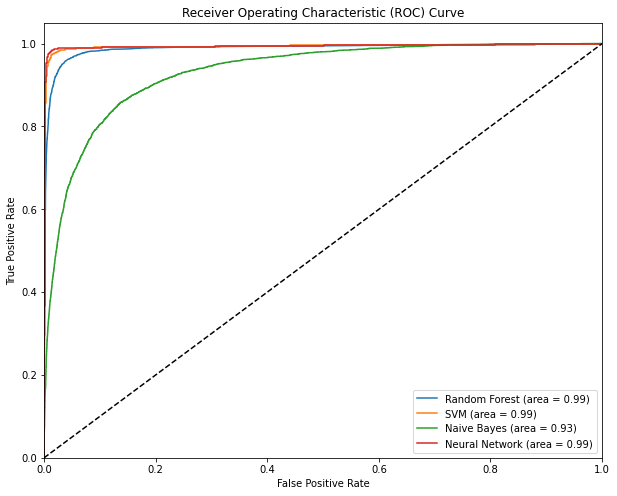

In [36]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, grid_search in zip(models.keys(), grid_searches):
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(len(np.unique(y))):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(pd.get_dummies(y_test).values.ravel(), 
                                             y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

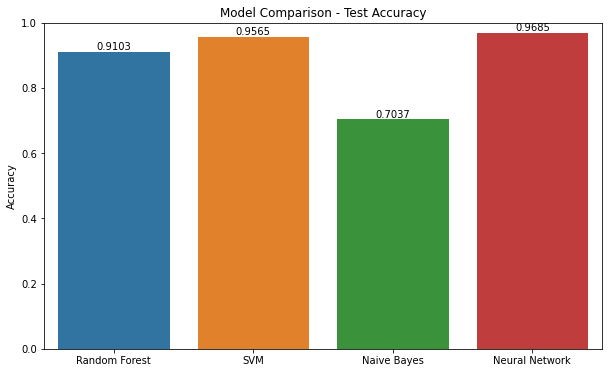


Training completed for all models.


In [37]:

# Final model comparison
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test)) 
              for model in [gs.best_estimator_ for gs in grid_searches]]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison - Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

print("\nTraining completed for all models.")


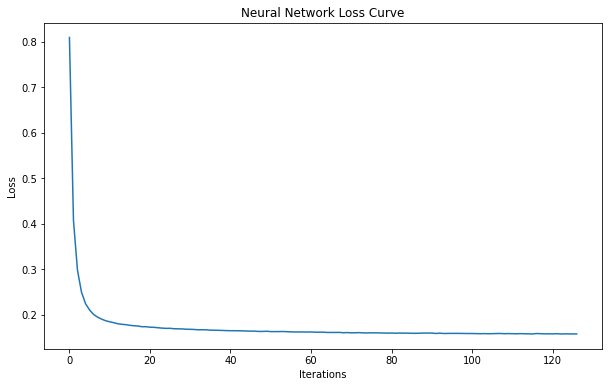

In [38]:
# Plot Neural Network loss curve if available
for grid_search in grid_searches:
    if isinstance(grid_search.best_estimator_.named_steps['classifier'], MLPClassifier):
        plt.figure(figsize=(10, 6))
        plt.plot(grid_search.best_estimator_.named_steps['classifier'].loss_curve_)
        plt.title('Neural Network Loss Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()